In [116]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import mwparserfromhell
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [211]:
df = pd.read_csv('wiki-RFA.csv', index_col=0, parse_dates=['Date'])
df.Comment = df.Comment.astype(str)

In [212]:
df["Parsed_Comment"] = df.Comment.apply(lambda x: mwparserfromhell.parse(x).strip_code())
df

,Source,Target,Vote,Results,Year,Date,Comment,Parsed_Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,Support as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,Support as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,Support per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,Support per noms. BDD is a strong contributor ...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...","Support, with great pleasure. I work with BDD ..."
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....,Support. Age has nothing to do with maturity....


In [213]:
stat_df = pd.DataFrame(columns = ['Comment', 'Parsed_Comment'])
stat_df['Comment'] = df['Comment']
stat_df['Parsed_Comment']=df['Parsed_Comment']

In [214]:
vectorizer = CountVectorizer()
stat_df['Vectorized_Comment'] = stat_df['Parsed_Comment'].apply(lambda x: vectorizer.build_analyzer()(x))
stat_df['Vector_Size'] = stat_df['Vectorized_Comment'].apply(lambda x: len(x))
stat_df

,Comment,Parsed_Comment,Vectorized_Comment,Vector_Size
0,'''Support''' as co-nom.,Support as co-nom.,"[support, as, co, nom]",4
1,'''Support''' as nominator.--,Support as nominator.--,"[support, as, nominator]",3
2,'''Support''' per noms.,Support per noms.,"[support, per, noms]",3
3,'''Support''' per noms. BDD is a strong contri...,Support per noms. BDD is a strong contributor ...,"[support, per, noms, bdd, is, strong, contribu...",19
4,"'''Support''', with great pleasure. I work wit...","Support, with great pleasure. I work with BDD ...","[support, with, great, pleasure, work, with, b...",34
...,...,...,...,...
198270,Support,Support,[support],1
198271,Support.,Support.,[support],1
198272,Support. --,Support. --,[support],1
198273,Support. Age has nothing to do with maturity....,Support. Age has nothing to do with maturity....,"[support, age, has, nothing, to, do, with, mat...",8


### Distribution plot

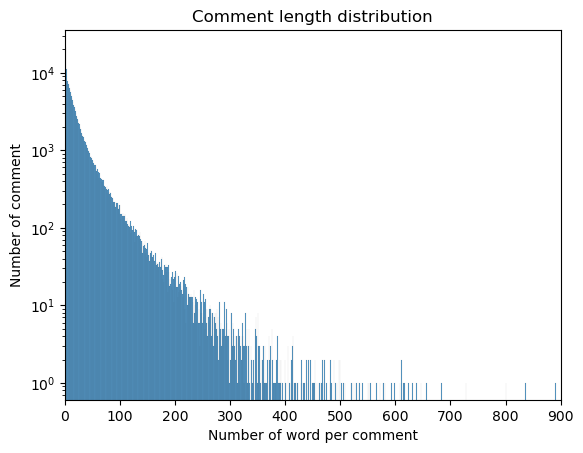

In [139]:
sns.histplot(stat_df['Vector_Size'],binwidth=1, kde=False)  
plt.title('Comment length distribution')
plt.xlabel('Number of word per comment')
plt.ylabel('Number of comment')
plt.xlim(0,900)
plt.yscale('log') #pas sûre si ok de mettre log scale ici
plt.show()

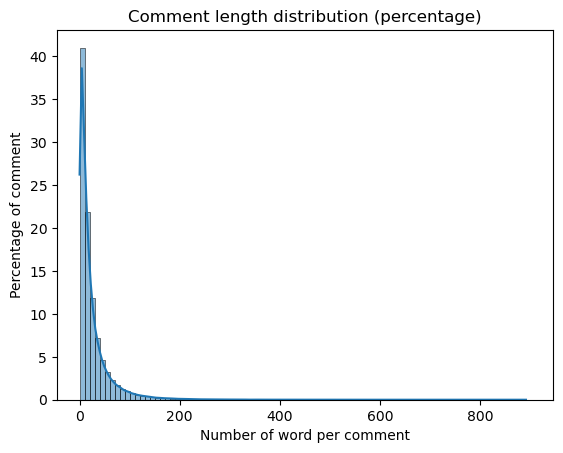

In [147]:
sns.histplot(data=stat_df, x='Vector_Size', kde=True, binwidth=10, stat='percent') #j'ai pris 10 arbitrairement, à changer au besoin
plt.title('Comment length distribution (percentage)')
plt.xlabel('Number of word per comment')
plt.ylabel('Percentage of comment')
plt.show()

### Comment analysis

In [159]:
print('The minimun length of the comment is: ', np.min(stat_df['Vector_Size']))
proportion_no_comment=np.sum(stat_df['Vector_Size']==0)/np.sum(stat_df['Vector_Size'])*100
print('The percentage of vote without comment is: ', proportion_no_comment)

print('The maximum length of the comment is: ', np.max(stat_df['Vector_Size']))

The minimun length of the comment is:  0
The percentage of vote without comment is:  0.03685733953029966
The maximum length of the comment is:  891


One word comment analysis

In [217]:
one_word = stat_df[stat_df['Vector_Size']==1]

print('Proportion of comment of one word', len(one_word['Vector_Size'])/np.sum(stat_df['Vector_Size'])*100)
print('The proportion of one word comment which is "nan" is: ', np.sum(np.concatenate(one_word['Vectorized_Comment'].values)=='nan')/len(one_word['Vector_Size'])*100)

one_word_support = one_word[(np.concatenate(one_word['Vectorized_Comment'].values)=='support')]
print('The proportion of one word comment which is "support" is: ', len(one_word_support)/len(one_word['Vector_Size'])*100)

one_word_other = one_word[(np.concatenate(one_word['Vectorized_Comment'].values)!='support') & (np.concatenate(one_word['Vectorized_Comment'].values)!='nan')]
print('The proportion of one word comment which is NOT "support" or "nan" is: ', len(one_word_other)/len(one_word['Vector_Size'])*100)

one_word_other

Proportion of comment of one word 0.436921092766244
The proportion of one word comment which is "nan" is:  33.45430857993672
The proportion of one word comment which is "support" is:  56.88628326819282
The proportion of one word comment which is NOT "support" or "nan" is:  9.659408151870464


,Comment,Parsed_Comment,Vectorized_Comment,Vector_Size
162,'''Good''' --,Good --,[good],1
193,Sure.--''',Sure.--''',[sure],1
269,100%.,100%.,[100],1
936,Ja.,Ja.,[ja],1
1390,'''Sure''' -,Sure -,[sure],1
...,...,...,...,...
197993,Negativo.,Negativo.,[negativo],1
198029,OPPOSE.,OPPOSE.,[oppose],1
198037,NO.,NO.,[no],1
198045,Likewise.,Likewise.,[likewise],1


In [224]:
#En cours = plot le pourcentahe d'apparition des mots pour les commentaires d'un seul mot

"""sns.countplot(data=one_word, x= 'Vectorized_Comment', stat='percent')"""

"sns.countplot(data=one_word, x= 'Vectorized_Comment', stat='percent')"